In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from math import floor

In [192]:
# from google.colab import drive
# drive.mount('/content/drive')

In [193]:
df = pd.read_csv('Weather_Data.csv')
df.sample(10)

,Date,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,RainToday,Evaporation,Sunshine,WindGustDir,...,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm
1930,16-05-18,18.3,20.3,15.8,21.9,0.0,No,9.8,10.4,SE,...,SSW,SSE,26,33,60,44,1011.2,1010.8,2,2
1474,14-02-17,15.4,21.5,12.9,22.8,0.0,No,3.4,10.3,W,...,W,ESE,19,17,68,57,1022.0,1020.5,5,4
686,19-12-14,17.8,18.6,17.7,20.2,12.0,Yes,2.8,0.0,W,...,SSW,SSW,17,20,91,85,1016.2,1016.4,8,8
528,14-07-14,9.2,14.5,8.1,16.5,0.0,Yes,2.0,2.5,W,...,W,SW,24,22,78,47,1012.3,1010.3,6,7
966,25-09-15,17.8,22.5,12.9,26.7,0.2,No,3.8,12.1,NE,...,W,ENE,13,24,73,56,1018.0,1015.0,1,5
1984,09-07-18,18.5,21.9,14.9,22.9,2.8,No,3.4,7.3,SW,...,S,SE,22,20,59,49,1018.8,1019.5,7,2
2762,25-08-20,26.3,23.2,22.4,28.1,0.0,Yes,5.0,8.2,NW,...,NNE,ESE,11,6,72,86,1003.3,1001.9,3,7
2544,20-01-20,9.1,13.7,8.5,14.1,1.2,Yes,2.2,0.0,W,...,W,SSW,20,11,90,88,1028.7,1027.6,7,7
1066,03-01-16,21.3,24.3,20.4,25.7,0.0,No,7.2,4.7,NNE,...,W,E,7,24,85,70,1023.4,1020.3,5,4
398,06-03-14,20.5,25.8,17.7,26.3,0.0,No,4.8,9.2,W,...,SW,ESE,11,19,77,58,1014.2,1011.8,3,1


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   Temp9am        3271 non-null   float64
 2   Temp3pm        3271 non-null   float64
 3   MinTemp        3271 non-null   float64
 4   MaxTemp        3271 non-null   float64
 5   Rainfall       3271 non-null   float64
 6   RainToday      3271 non-null   object 
 7   Evaporation    3271 non-null   float64
 8   Sunshine       3271 non-null   float64
 9   WindGustDir    3271 non-null   object 
 10  WindGustSpeed  3271 non-null   int64  
 11  WindDir9am     3271 non-null   object 
 12  WindDir3pm     3271 non-null   object 
 13  WindSpeed9am   3271 non-null   int64  
 14  WindSpeed3pm   3271 non-null   int64  
 15  Humidity9am    3271 non-null   int64  
 16  Humidity3pm    3271 non-null   int64  
 17  Pressure9am    3271 non-null   float64
 18  Pressure

### Breakdown dataset into each year dataframe

In [195]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

df['Year'] = df['Date'].dt.year

all_year_df = {}

for year in df['Year'].unique():
    all_year_df[year] = df[df['Year'] == year]

for i in range(2013, 2023):
  print(f"{i}: {len(all_year_df[i])}")

2013: 334
2014: 365
2015: 365
2016: 366
2017: 365
2018: 365
2019: 365
2020: 366
2021: 365
2022: 15


The dataset contains unmatched data
- Making each dataframe with similar number of entries.
- Deleting the 2022 dataframe since it is an outlier.

In [196]:
# Deleting the 2022 dataset since it is an outlier

for year in df['Year'].unique():
    all_year_df[year] = df[df['Year'] == year].head(330)

del all_year_df[2022]

for i in range(2013, 2023):
    if i in all_year_df:  # Correct way to check if a key exists
        print(f"{i}: {len(all_year_df[i])}")
    else:
        print(f"{i}: 0")

2013: 330
2014: 330
2015: 330
2016: 330
2017: 330
2018: 330
2019: 330
2020: 330
2021: 330
2022: 0


## Adding additional columns

In [197]:
for year in df['Year'].unique():

    year_df = df[df['Year'] == year].copy()

    # humidityIncrease column
    year_df['humidityIncrease'] = year_df['Humidity3pm'] > year_df['Humidity9am']
    all_year_df[year] = year_df

In [198]:
print(all_year_df[2013].head())

        Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall RainToday  \
0 2013-02-01     20.7     20.9     19.5     22.4      15.6       Yes   
1 2013-02-02     22.4     24.8     19.5     25.6       6.0       Yes   
2 2013-02-03     23.5     23.0     21.6     24.5       6.6       Yes   
3 2013-02-04     21.4     20.9     20.2     22.8      18.8       Yes   
4 2013-02-05     22.5     25.5     19.7     25.7      77.4       Yes   

   Evaporation  Sunshine WindGustDir  ...  WindSpeed9am WindSpeed3pm  \
0          6.2       0.0           W  ...            17           20   
1          3.4       2.7           W  ...             9           13   
2          2.4       0.1           W  ...            17            2   
3          2.2       0.0           W  ...            22           20   
4          4.8       0.0           W  ...            11            6   

  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0          92           84       1017.6       1017.4      

## <ins> Breakdown the data </ins>

### <ins> Analysis and information about the data </ins>
As per my view after several read through of the dataset:
- It contains weather data for ten consecutive years ranging from 2013 to 2022.

### Procedures:
- Here, I had separated the data into ten different data frames.
- Comparison among the each of the year's data and take insights. At this moment, I've accumulated five innovative analysis questions as follows:

  1. The year with maximum and minimum temperature.
  2. The year with most sunny days.
  3. The year with most and least rainy days.
  4. The year with most rainfall.
  5. The year with most and least humidity.

# 1. <ins>**The year with maximum and minimum temperature.**</ins>

In [199]:
max_temp = 0
min_temp = float('inf')
max_temp_year = 0
min_temp_year = 0

temperature_data = {}

for i in range(2013, 2022):
    year_max_temp = all_year_df[i]['MaxTemp'].max()
    year_min_temp = all_year_df[i]['MinTemp'].min()

    if year_max_temp >= max_temp:
        max_temp = year_max_temp
        max_temp_year = i
    if year_min_temp <= min_temp:
        min_temp = year_min_temp
        min_temp_year = i

    temperature_data[i] = all_year_df[i]['MaxTemp'].mean()

print(f"Maximum temperature: {max_temp} in {max_temp_year}")
print(f"Minimum temperature: {min_temp} in {min_temp_year}")

Maximum temperature: 45.8 in 2017
Minimum temperature: 4.3 in 2015


Plot

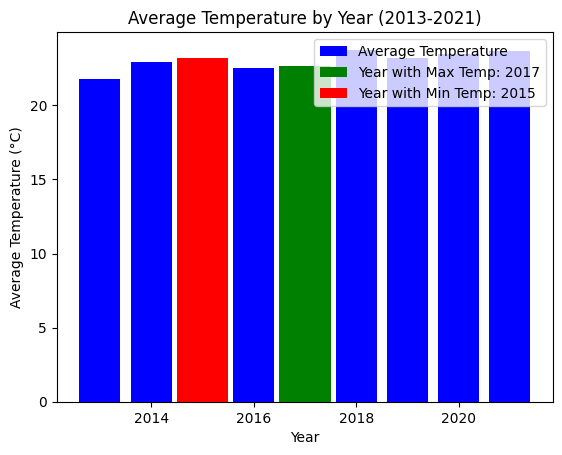

In [200]:
plt.bar(temperature_data.keys(), temperature_data.values(), color='blue', label='Average Temperature')

plt.bar(max_temp_year, temperature_data[max_temp_year], color='green', label=f'Year with Max Temp: {max_temp_year}', width=1)
plt.bar(min_temp_year, temperature_data[min_temp_year], color='red', label=f'Year with Min Temp: {min_temp_year}', width=1)

plt.title('Average Temperature by Year (2013-2021)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.show()

# 2. <ins>**The year with maximum and minimum sunshine days.**</ins>

- Sunshine refers to hours of bright sunshine recorded in a day.

In [201]:
max_sunshine_val = 0
min_sunshine_val = float('inf')
max_sunshine_year = 0
min_sunshine_year = 0

sunshine_data = {}

for i in range(2013, 2022):
    year_max_sunshine = all_year_df[i]['Sunshine'].mean()
    sunshine_data[i] = year_max_sunshine

    if all_year_df[i]['Sunshine'].max() >= max_sunshine_val:
        max_sunshine_val = all_year_df[i]['Sunshine'].max()
        max_sunshine_year = i

    if all_year_df[i]['Sunshine'].min() <= min_sunshine_val:
        min_sunshine_val = all_year_df[i]['Sunshine'].min()
        min_sunshine_year = i

print(f"Maximum sunny year: {max_sunshine_year} with sunshine value: {max_sunshine_val}")
print(f"Minimum sunny year: {min_sunshine_year} with sunshine value: {min_sunshine_val}")

Maximum sunny year: 2018 with sunshine value: 13.6
Minimum sunny year: 2021 with sunshine value: 0.0


Plot

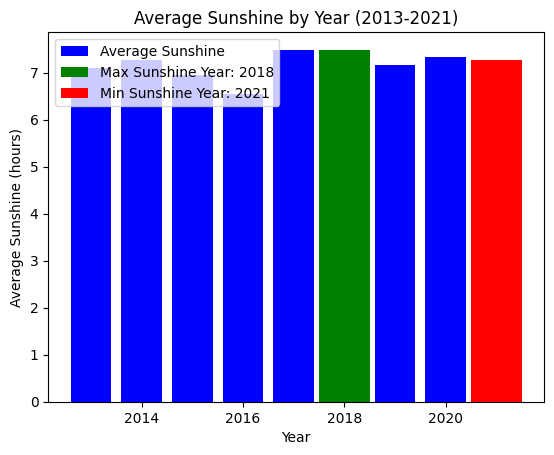

In [202]:
plt.bar(sunshine_data.keys(), sunshine_data.values(), color='blue', label='Average Sunshine')
plt.bar(max_sunshine_year, sunshine_data[max_sunshine_year], color='green', label=f'Max Sunshine Year: {max_sunshine_year}', width=1)
plt.bar(min_sunshine_year, sunshine_data[min_sunshine_year], color='red', label=f'Min Sunshine Year: {min_sunshine_year}', width=1)

plt.title('Average Sunshine by Year (2013-2021)')
plt.xlabel('Year')
plt.ylabel('Average Sunshine (hours)')
plt.legend()
plt.show()

# 3. <ins>**The year with most and least rainy days.**</ins>

In [203]:
most_rainy_year = 0
max_rainy_days = 0

least_rainy_year = 0
min_rainy_days = float('inf') 

rainy_days_cnt_data = {}

for year in range(2013, 2022):
    rainy_days_count = all_year_df[year]['RainToday'].value_counts().get('Yes', 0)

    if rainy_days_count > max_rainy_days:
        max_rainy_days = rainy_days_count
        most_rainy_year = year

    if rainy_days_count < min_rainy_days:
        min_rainy_days = rainy_days_count
        least_rainy_year = year
    
    rainy_days_cnt_data[year] = rainy_days_count

print(f"The year with the most rainy days is {most_rainy_year} with {max_rainy_days} rainy days.")
print(f"The year with the least rainy days is {least_rainy_year} with {min_rainy_days} rainy days.")
# print(f"2014 rainy day count: {all_year_df[2014]['RainToday'].value_counts().get('Yes', 0)}")

The year with the most rainy days is 2016 with 111 rainy days.
The year with the least rainy days is 2017 with 78 rainy days.


Plot

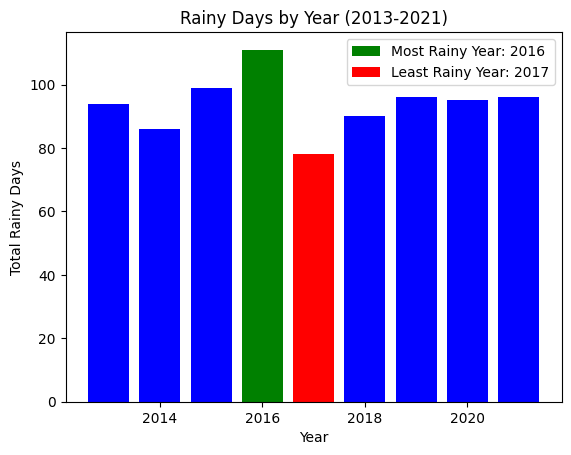

In [204]:
plt.bar(rainy_days_cnt_data.keys(), rainy_days_cnt_data.values(), color='blue')

plt.bar(most_rainy_year, max_rainy_days, color='green', label=f'Most Rainy Year: {most_rainy_year}')
plt.bar(least_rainy_year, min_rainy_days, color='red', label=f'Least Rainy Year: {least_rainy_year}')

plt.title('Rainy Days by Year (2013-2021)')
plt.xlabel('Year')
plt.ylabel('Total Rainy Days')
plt.legend()
plt.show()

# 4. <ins>**The year with most and least rainfall.**</ins>


In [205]:
most_rainfall_year = 0
max_rainfall = 0

least_rainfall_year = 0
min_rainfall = float('inf')

rainfall_data = {}

for year in range(2013, 2022):
    total_rainfall = all_year_df[year]['Rainfall'].sum()

    if total_rainfall > max_rainfall:
        max_rainfall = total_rainfall
        most_rainfall_year = year

    if total_rainfall < min_rainfall:
        min_rainfall = total_rainfall
        least_rainfall_year = year
    
    rainfall_data[year] = total_rainfall

print(f"The year with the most rainfall is {most_rainfall_year} with {max_rainfall} total rainfall.")
print(f"The year with the least rainfall is {least_rainfall_year} with {min_rainfall} total rainfall.")

The year with the most rainfall is 2016 with 1563.6 total rainfall.
The year with the least rainfall is 2014 with 965.4000000000001 total rainfall.


Plot

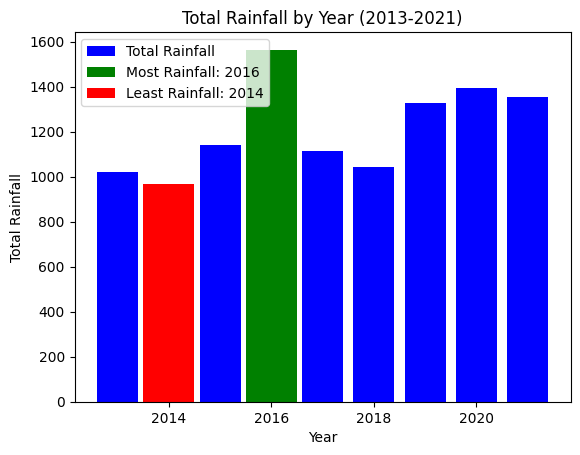

In [206]:
plt.bar(rainfall_data.keys(), rainfall_data.values(), color='blue', label='Total Rainfall')

plt.bar(most_rainfall_year, max_rainfall, color='green', label=f'Most Rainfall: {most_rainfall_year}', width=1)
plt.bar(least_rainfall_year, min_rainfall, color='red', label=f'Least Rainfall: {least_rainfall_year}', width=1)

plt.title('Total Rainfall by Year (2013-2021)')
plt.xlabel('Year')
plt.ylabel('Total Rainfall')
plt.legend()
plt.show()


# 5. <ins>**The year with most and least humidity.**</ins>

The humidity difference can lead to discomfort. If humidity in afternoon (3 PM) is grater than morning (9 AM) can lead to rainy or stormy weather. 

In [207]:
most_humidity_year = 0
max_humidity_day_cnt = 0
least_humidity_year = 0
min_humidity_day_cnt = float('inf')  

humidity_data = {}

for year in range(2013, 2022):
    true_count = all_year_df[year]['humidityIncrease'].sum()
    humidity_data[year] = true_count 

    if true_count > max_humidity_day_cnt:
        max_humidity_day_cnt = true_count
        most_humidity_year = year

    if true_count < min_humidity_day_cnt:
        min_humidity_day_cnt = true_count
        least_humidity_year = year

print(f"Most humidity increase year is {most_humidity_year} with {max_humidity_day_cnt} days.")
print(f"Least humidity increase year is {least_humidity_year} with {min_humidity_day_cnt} days.")

Most humidity increase year is 2016 with 57 days.
Least humidity increase year is 2014 with 34 days.


Plot

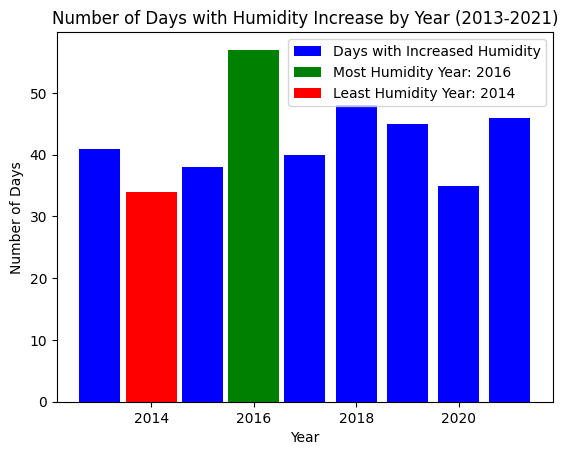

In [208]:
plt.bar(humidity_data.keys(), humidity_data.values(), color='blue', label='Days with Increased Humidity')
plt.bar(most_humidity_year, humidity_data[most_humidity_year], color='green', label=f'Most Humidity Year: {most_humidity_year}', width=1)
plt.bar(least_humidity_year, humidity_data[least_humidity_year], color='red', label=f'Least Humidity Year: {least_humidity_year}', width=1)

plt.title('Number of Days with Humidity Increase by Year (2013-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend()
plt.show()

Analysis result

1. Most humidity year is also the year of most rainfall as well as most rainy year 
2. Least humidity year is also the year of least rainfall